In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel("UpdatedStudentSurvey.xlsx")
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score:  0.6380912233766727


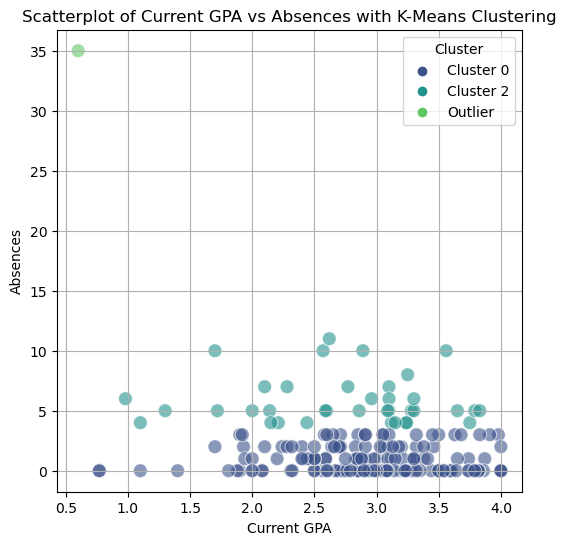

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in 'Current GPA' and 'Absences'
missing_values = df[['Current GPA', 'Absences']].isnull().sum()

# If no significant missing values, proceed with clustering
if missing_values.sum() == 0:
    # Extracting the necessary columns
    clustering_data = df[['Current GPA', 'Absences']].values
    
    # Applying K-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=0)  # Using 3 clusters initially, can adjust based on results
    cluster_labels = kmeans.fit_predict(clustering_data)
    
    # Rename cluster labels
    cluster_labels = ['Outlier' if x == 1 else 'Cluster 0' if x == 0 else 'Cluster 2' for x in cluster_labels]
    
    sil_score = silhouette_score(clustering_data, cluster_labels, metric='euclidean')
    print("Silhouette Score: ", sil_score)
    
    # Creating the scatterplot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=clustering_data[:, 0], y=clustering_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.6)
    plt.title('Scatterplot of Current GPA vs Absences with K-Means Clustering')
    plt.xlabel('Current GPA')
    plt.ylabel('Absences')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print(missing_values)


In [4]:
def convert_range_to_midpoint(value):
    if isinstance(value, str):  # Check if the input is a string
        if ' - ' in value:
            low, high = value.split(' - ')
            return (int(low) + int(high)) / 2
        elif value.startswith('>'):
            return int(value[2:]) + 1
        elif value.startswith('<'):
            return (int(value[2:]) - 1) / 2
        elif "Don't Play" in value or "Don't Work" in value:
            return 0
    return value  # Return the input as is if it's not a string

# Assuming df is your DataFrame
# Convert 'CCA Hours' to handle "Don't Have CCA" and ensure it's numeric
df['CCA Hours'] = df['CCA Hours'].replace("Don't Have CCA", 0)
df['CCA Hours'] = pd.to_numeric(df['CCA Hours'], errors='coerce').fillna(0)

# Apply the conversion function to other relevant columns
df['Game Hours'] = df['Game Hours'].apply(convert_range_to_midpoint)
df['Part-Time Hours'] = df['Part-Time Hours'].apply(convert_range_to_midpoint)

# Display the transformed data for confirmation
df[['Game Hours', 'Part-Time Hours', 'CCA Hours']].head(20)

,Game Hours,Part-Time Hours,CCA Hours
0,34.5,0.0,0
1,0.0,13.0,0
2,24.5,0.0,0
3,85.0,36.0,0
4,44.5,0.0,0
5,14.5,0.0,0
6,0.0,2.0,0
7,0.0,0.0,0
8,24.5,0.0,0
9,0.0,13.0,0


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.78


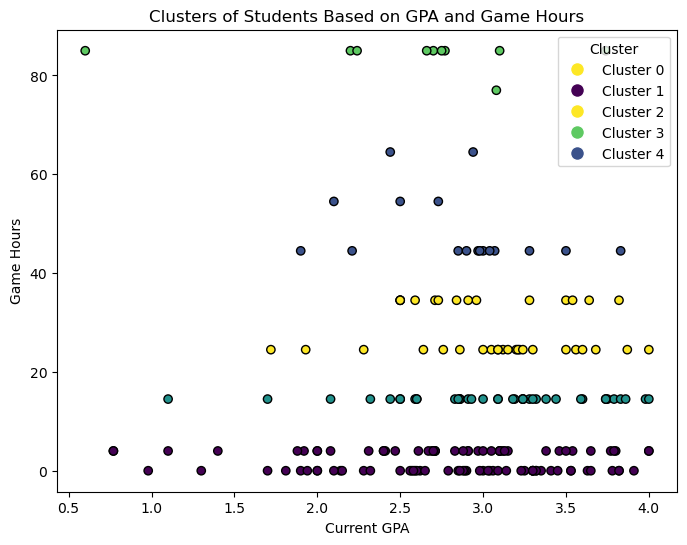

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming 'df' is your DataFrame and it's already loaded

# Prepare the data
features = df[['Current GPA', 'Game Hours']]

# Define and fit the KMeans model on the original data
kmeans = KMeans(n_clusters=5, random_state=42)  # adjust the number of clusters as needed
kmeans.fit(features)

# Predict clusters
clusters = kmeans.predict(features)

# Calculate silhouette score (optional, for assessing the quality of clustering)
sil_score = silhouette_score(features, clusters)
print("Silhouette Score: {:.2f}".format(sil_score))

# Visualization without color bar and with a custom legend
plt.figure(figsize=(8, 6))
scatter = plt.scatter(features['Current GPA'], features['Game Hours'], c=clusters, cmap='viridis', marker='o', edgecolor='k')

# Create custom labels for the legend
colors = [scatter.cmap(scalar) for scalar in scatter.norm(clusters)]
unique_clusters = np.unique(clusters)
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
legend_labels = {i: labels[i] for i in unique_clusters}  # Create a dictionary to map cluster numbers to your labels

# Handle legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in unique_clusters]
plt.legend(handles=handles, title='Cluster', loc='upper right')

plt.title('Clusters of Students Based on GPA and Game Hours')
plt.xlabel('Current GPA')
plt.ylabel('Game Hours')
plt.show()
